# sam mask generation test

In [1]:
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image
import numpy as np
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry


sam = sam_model_registry["vit_h"](checkpoint="/home/dataset/sam/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

## non-word mask generation

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


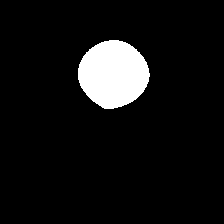

In [42]:
img = Image.open("/home/dataset/mvtec/cable/train/good/002.png")
img = np.array(img)
masks = mask_generator.generate(img)
print(masks[0].keys())
mask = Image.fromarray(masks[0]["segmentation"]).resize((224,224))
mask.show()

Textarea(value='', description='event:', layout=Layout(height='40px', width='50%'), placeholder='data')

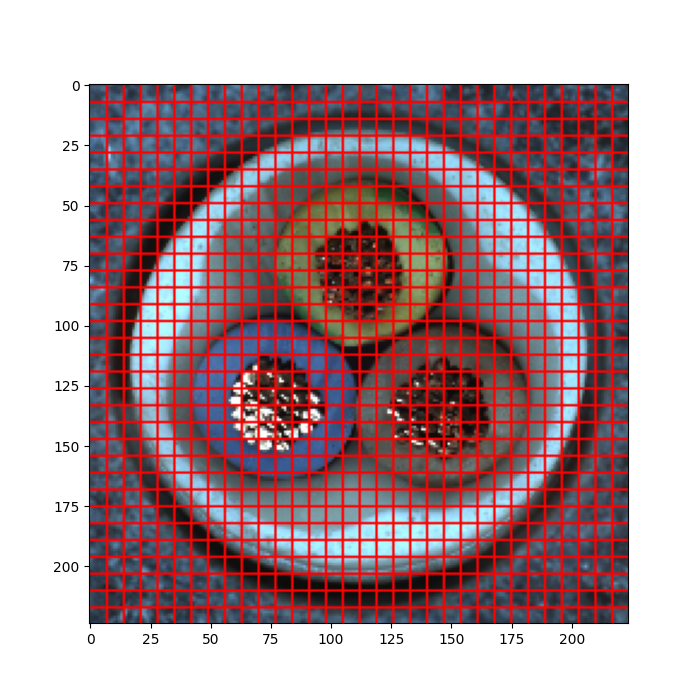

In [15]:
# グリッド画像用意
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Textarea,Layout

# 高さ方向と幅方向のグリッド間隔
y_step = 7
x_step = 7

user_image_path = '/home/dataset/mvtec/cable/train/good/002.png'
img = cv2.imread(user_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224))
y_img, x_img = img.shape[:2]

# 指定した色で横線を引く [Red, Green, Blue]
img[y_step:y_img:y_step, :, :] = [255, 0, 0]
# 指定した色で縦線を引く [Red, Green, Blue]
img[:, x_step:x_img:x_step, :] = [255, 0, 0]

#画像をBGRからRGBに変換して保存
# cv2.imwrite('./grid_image.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# GUI
%matplotlib widget

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(img)

# Create and display textarea widget
txt = Textarea(
    value='',
    placeholder='data',
    description='event:',
    disabled=False,
    layout=Layout(width='50%', height='40px'))
display(txt)

def onclick(event):
    if event.xdata is not None and event.ydata is not None: # クリック位置が画像内であることを確認
        x_p = event.xdata//7+1
        y_p = event.ydata//7+1
        patch_str = "<patch_index_{:04}>".format(int((y_p-1)*32+x_p-1))
        txt.value = patch_str
        ax.plot(event.xdata, event.ydata,'ro')
        plt.draw() # 追加するプロットをすぐに表示するため
        print(f'(x,y)={5*7*(x_p-1),5*7*(y_p-1)}')

ka = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()



In [4]:
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image

sam = sam_model_registry["vit_h"](checkpoint="/home/dataset/sam/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
img = Image.open("/home/dataset/mvtec/cable/train/good/003.png")
img = np.array(img)
predictor.set_image(img)
masks, _, _ = predictor.predict(point_coords=np.array([[385, 630],[560,350],[700,665],[560,910],[245,245],[805,245]]),point_labels=np.array([0,0,0,1,1,1]))
# masks, _, _ = predictor.predict(point_coords=np.array([[560,910],[245,245],[805,245]]),point_labels=np.array([0,0,0]))

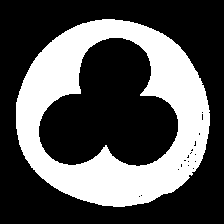

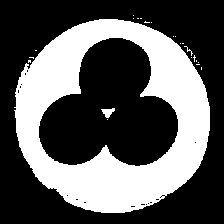

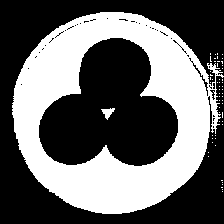

In [5]:
# masks
# mask_0 = Image.fromarray(masks[0]).resize((224,224))
for mask in masks:
    mask = Image.fromarray(mask).resize((224,224))
    mask.show()